45
Filename: /home/ambra/Desktop/cluster-morgana/run0406_lc_v02/run0406_ID000126/detection_all/obs_run0406_2000s_lightcurve2000s_100s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  LIGHTCURVE    1 BinTableHDU     51   20R x 14C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
None

 shape: (20,) 
 type: record896
Filename: /home/ambra/Desktop/cluster-morgana/crab_lc_v02/crab_lc/detection_all/crab_lightcurve2000s_100s.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       8   ()      
  1  LIGHTCURVE    1 BinTableHDU     51   20R x 14C   [1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D, 1D]   
None

 shape: (20,) 
 type: record896


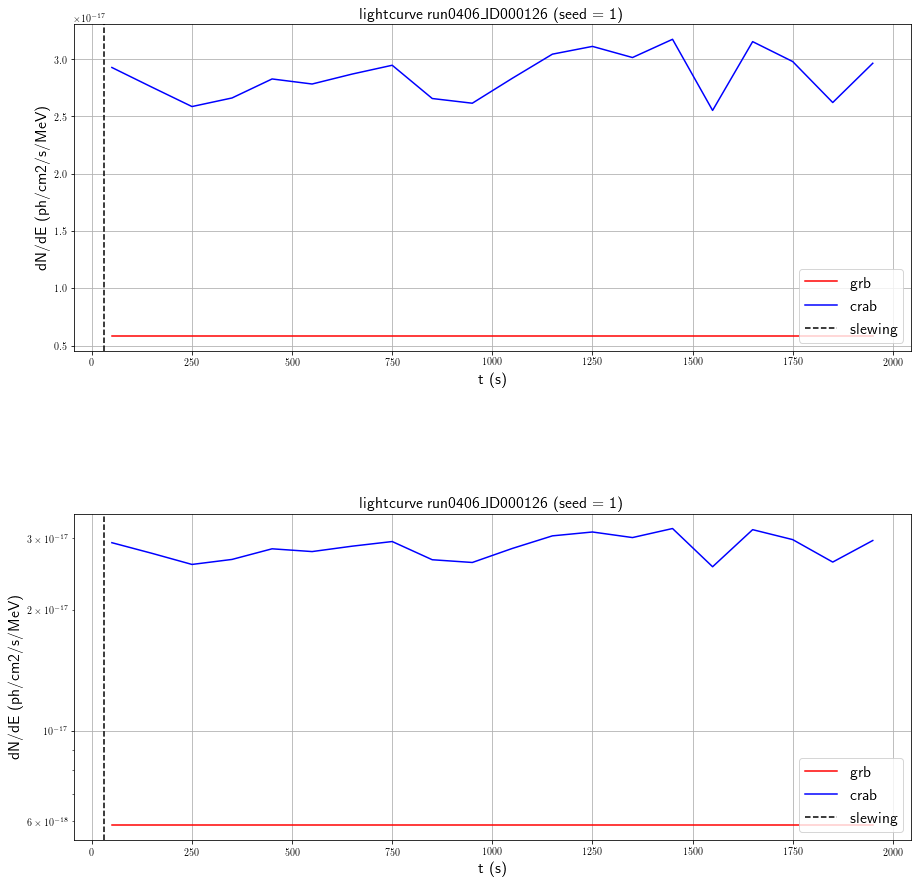

/home/ambra/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


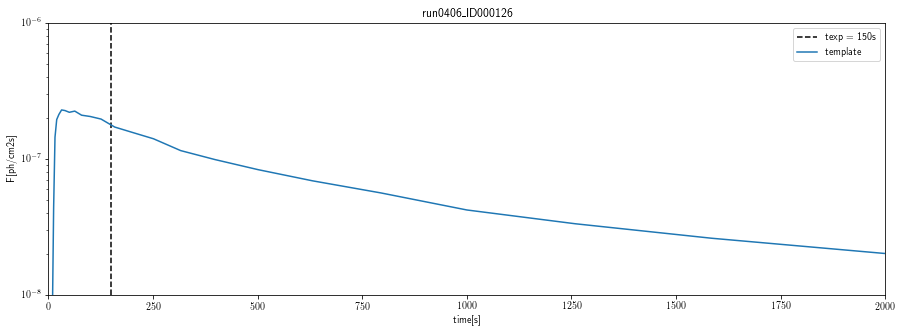

In [20]:
# ==================
# !!! LIGHTCURVE !!!
# ==================

from module_plot import *

tmax = 2000
wbin = [1,5,10,100]

path_grb = '/home/ambra/Desktop/cluster-morgana/run0406_lc_v02/run0406_ID000126/detection_all/'
grb = ['obs_run0406_2000s_lightcurve2000s_%ds.fits' %wbin[i] for i in range(len(wbin))]

path_crab = '/home/ambra/Desktop/cluster-morgana/crab_lc_v02/crab_lc/detection_all/'
crab = ['crab_lightcurve2000s_%ds.fits' %wbin[i] for i in range(len(wbin))]

k=3
lightcurve_grb = path_grb + grb[k]
lightcurve_crab = path_crab + crab[k]


# ====================== TEMPLATE ==============

hdul =  fits.open('/home/ambra/Desktop/cluster-morgana/run0406_lc_v02/run0406_ID000126.fits')
## 41 energybins [GeV]
energy=np.array(hdul[1].data)
# 71 timebins [s]
time=np.array(hdul[2].data)
# 71 spettri
spectra=np.array(hdul[3].data)

Nt=len(time)
Ne=len(energy)


# DEFINISCO LA GRIGLIA TEMPORALE
t=[0.0 for x in range(Nt+1)]
for i in range(Nt-1):
    t[i+1]=time[i][0]+(time[i+1][0]-time[i][0])/2
# definisco il tmax dell'ultimo bin
t[Nt]=time[Nt-1][0]+(time[Nt-1][0]-t[Nt-1])

# stop the second after higher tmax ---!
tbin_stop = 1
for bin in range(len(t)) :
    if t[bin] <= tmax :
        tbin_stop += 1
    else :
        continue

print(tbin_stop)


# DEFINISCO LA GRIGLIA DI ENERGIE
en=[1.0 for x in range(Ne+1)]
for i in range(Ne-1):
    en[i+1]=energy[i][0]+(energy[i+1][0]-energy[i][0])/2
# definisco il tmax dell'ultimo bin
en[Ne]=energy[Ne-1][0]+(energy[Ne-1][0]-en[Ne-1])


# CALCOLO IL FLUSSO IN CIASCUN BIN temporale
f=[0.0 for x in range(tbin_stop)]
for i in range(tbin_stop):
    f[i]=0
    for j in range(Ne):
        #print energy[j][0],spectra[i][j]
        f[i]=f[i]+spectra[i][j]*(en[j+1]-en[j])
#        f[i]=f[i]+spectra[i][j]*0.03*(en[j+1]-en[j])
#        f[i]=f[i]+spectra[i][j]



# ====================== GRB ==================

hdulist = fits.open(lightcurve_grb)
print(hdulist.info())

# get data ---!
data = hdulist[1].data
print('\n shape:', data.shape, '\n type:', data.dtype.name)

# store data ---!
t_mjd = data.field(0)  # days
et_mjd = data.field(1)  # days
#RA = data.field(2) # deg
#eRA = data.field(3) # deg
#DEC = data.field(4) # deg
#eDEC = data.field(5) # deg
prefactor = data.field(6)  # ph/cm^2/s/MeV
e_prefactor = data.field(7)  # ph/cm^2/s/MeV
#index = data.field(8)
#e_index = data.field(9)
TS = data.field(10)
diff_uplim = data.field(11) # ph/cm^2/s/MeV
flux_uplim = data.field(12) # ph/cm^2/s
Eflux_uplim = data.field(13) # erg/cm^2/s

hdulist.close()

pnts = []
e_pnts = []
t_pnts = []
et_pnts = []
ul_pnts = []
eul_pnts = []
tul_pnts = []
etul_pnts = []
flux = []
uflux = []
eflux = []
euflux = []
Eflux = []

# list flux point or upper limit ---!
for el in range(len(data)) :
    if TS[el] > 9 and 2.0*e_prefact[el] < prefact[el] :
#    if TS[el] > 9 :
        pnts.append(prefactor[el])
        e_pnts.append(e_prefactor[el])
        t_pnts.append(t_mjd[el])
        et_pnts.append(et_mjd[el])
        flux.append(flux_uplim[el]*1e-3)
        eflux.append(e_prefact[el]*3e6) # 1e6*3(pivot)
        Eflux.append(Eflux_uplim[el])

        
    else :
        ul_pnts.append(diff_uplim[el])
        eul_pnts.append(0.5*diff_uplim[el])
        tul_pnts.append(t_mjd[el])
        etul_pnts.append(et_mjd[el])
        uflux.append(flux_uplim[el]*1e-3)
        euflux.append(diff_uplim[el]*3e7) # 1e6*3(pivot)*10 false scale!! To better visualize
        Eflux.append(Eflux_uplim[el])


# ====================== CRAB ==================

hdulist2 = fits.open(lightcurve_crab)
print(hdulist2.info())

# get data ---!
data2 = hdulist2[1].data
print('\n shape:', data2.shape, '\n type:', data2.dtype.name)

# store data ---!
t_mjd2 = data2.field(0)  # days
et_mjd2 = data2.field(1)  # days
#RA2 = data2.field(2) # deg
#eRA2 = data2.field(3) # deg
#DEC2 = data2.field(4) # deg
#eDEC2 = data2.field(5) # deg
prefactor2 = data2.field(6)  # ph/cm^2/s/MeV
e_prefactor2 = data2.field(7)  # ph/cm^2/s/MeV
#index2 = data2.field(8)
#e_index2 = data2.field(9)
TS2 = data2.field(10)
diff_uplim2 = data2.field(11) # ph/cm^2/s/MeV
flux_uplim2 = data2.field(12) # ph/cm^2/s
#Eflux_uplim = data.field(13) # erg/cm^2/s

hdulist2.close()

pnts2 = []
e_pnts2 = []
t_pnts2 = []
et_pnts2 = []
ul_pnts2 = []
eul_pnts2 = []
tul_pnts2 = []
etul_pnts2 = []
flux2 = []
uflux2 = []
eflux2 = []
euflux2 = []
Eflux2 = []

# list flux point or upper limit ---!
for el in range(len(data2)) :
    if TS2[el] > 9 and 2.0*e_prefact2[el] < prefact2[el] :
#    if TS[el] > 9 :
        pnts2.append(prefactor2[el])
        e_pnts2.append(e_prefactor2[el])
        t_pnts2.append(t_mjd2[el])
        et_pnts2.append(et_mjd2[el])
        flux2.append(flux_uplim2[el]*1e-3)
        eflux2.append(e_prefact2[el]*3e6) # 1e6*3(pivot)
        Eflux2.append(Eflux_uplim[el])

        
    else :
        ul_pnts2.append(diff_uplim2[el])
        eul_pnts2.append(0.5*diff_uplim2[el])
        tul_pnts2.append(t_mjd2[el])
        etul_pnts2.append(et_mjd2[el])
        uflux2.append(flux_uplim2[el]*1e-3)
        euflux2.append(diff_uplim2[el]*3e7) # 1e6*3(pivot)*10 false scale!! To better visualize
        Eflux2.append(Eflux_uplim[el])

        
# ====================== CONVERT TIME ==================


t_pnts = np.array(t_pnts)
et_pnts = np.array(et_pnts)
tul_pnts = np.array(tul_pnts)
etul_pnts = np.array(etul_pnts)
t_pnts2 = np.array(t_pnts2)
et_pnts2 = np.array(et_pnts2)
tul_pnts2 = np.array(tul_pnts2)
etul_pnts2 = np.array(etul_pnts2)

# convert time from MJD to sec ---!
t = (t_pnts * 86400) - (51544.5 * 86400)
#et  = (et_pnts * 86400) - (51544.5 * 86400)
tul = (tul_pnts * 86400) - (51544.5 * 86400)
#etul = (etul_pnts * 86400) - (51544.5 * 86400)
t2 = (t_pnts2 * 86400) - (51544.5 * 86400)
#et2  = (et_pnts2 * 86400) - (51544.5 * 86400)
tul2 = (tul_pnts2 * 86400) - (51544.5 * 86400)
#etul2 = (etul_pnts2 * 86400) - (51544.5 * 86400)

t_tot = (t_mjd * 86400) - (51544.5 * 86400)
t_tot2 = (t_mjd2 * 86400) - (51544.5 * 86400)



# ====================== PLOT ==================


fig = plt.figure(figsize=(15,15))
plt.rc('text', usetex=True)

axisLim = 'auto'
title = 'none'
show = True

# figsize = (x, y)
ax1 = plt.subplot(211, yscale='linear')
# template ---!
#plt.plot(time[:tbin_stop],f, label='template lc')

# data ---!
#plt.errorbar(t, pnts, xerr=et_pnts, yerr=e_pnts, fmt='ro', mec='k', label='wbin=%1.fs' %wbin[k])
#plt.errorbar(tul, ul_pnts, xerr=[etul_pnts, etul_pnts], yerr=eul_pnts, uplims=True, fmt='ro', mec='k')
#plt.errorbar(t, flux, xerr=et_pnts, yerr=eflux, fmt='ro', mec='k', label='wbin=%1.fs' %wbin[k])
#plt.errorbar(tul, uflux, xerr=[etul_pnts, etul_pnts], yerr=euflux, uplims=True, fmt='ro', mec='k')

#flux_scaled = flux_uplim * 1e-3
#plt.plot(t_tot, flux_scaled, color='r')
plt.plot(t_tot, prefactor, color='r', label='grb')
plt.plot(t_tot2, prefactor2, color='b', label='crab')
plt.axvline(30, color='k', ls='--', label='slewing')
#plt.axvline(31, color='b', ls='--', label='exposures')
#plt.axvline(35, color='b', ls='--')
#plt.axvline(40, color='b', ls='--')
#plt.axvline(130, color='b', ls='--')


#plt.xlim([0,tmax])
plt.axis(axisLim) if axisLim != 'auto' else None
plt.grid()
plt.xlabel('t (s)', fontsize=16)
#plt.ylabel('F (ph/cm2/s)', fontsize=16)
plt.ylabel('dN/dE (ph/cm2/s/MeV)', fontsize=16)
plt.title('lightcurve run0406$\\_$ID000126 (seed = 1)', fontsize=16) 
ax1.legend(loc=4, fontsize=16)


ax2 = plt.subplot(212, yscale='log', xscale='linear')
# template ---!
#plt.plot(time[:tbin_stop],f, label='template lc')

# data ---!
#plt.errorbar(t, pnts, xerr=et_pnts, yerr=e_pnts, fmt='ro', mec='k', label='wbin=%1.fs' %wbin[k])
#plt.errorbar(tul, ul_pnts, xerr=[etul_pnts, etul_pnts], yerr=eul_pnts, uplims=True, fmt='ro', mec='k')
#plt.errorbar(t, flux, xerr=et_pnts, yerr=eflux, fmt='ro', mec='k', label='wbin=%1.fs' %wbin[k])
#plt.errorbar(tul, uflux, xerr=[etul_pnts, etul_pnts], yerr=euflux, uplims=True, fmt='ro', mec='k')

#flux_scaled = flux_uplim * 1e-3
#plt.plot(t_tot, flux_scaled, color='r')
plt.plot(t_tot, prefactor, color='r', label='grb')
plt.plot(t_tot2, prefactor2, color='b', label='crab')
plt.axvline(30, color='k', ls='--', label='slewing')
#plt.axvline(31, color='b', ls='--', label='exposures')
#plt.axvline(35, color='b', ls='--')
#plt.axvline(40, color='b', ls='--')
#plt.axvline(130, color='b', ls='--')
#plt.axvline(250, c='k', ls='--')
#ax2.plot([], [], c='w', label='30-500 GeV')
#ax2.plot([], [], c='w', label='wbin $\\approx$ 15s')


#axisLim = [0,tmax,9e-11,2e-6]
plt.axis(axisLim) if axisLim != 'auto' else None
plt.grid()
plt.xlabel('t (s)', fontsize=16)
#plt.ylabel('F (ph/cm2/s)', fontsize=16)
plt.ylabel('dN/dE (ph/cm2/s/MeV)', fontsize=16)
plt.title('lightcurve run0406$\\_$ID000126 (seed = 1)', fontsize=16) 
ax2.legend(loc=4, fontsize=16)

plt.subplots_adjust(hspace=0.5)

# save fig ---!
extent = ax1.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(grb[k].replace('.fits', '.png'), bbox_inches=extent.expanded(1.3, 1.3))

extent = ax2.get_window_extent().transformed(fig.dpi_scale_trans.inverted())
fig.savefig(grb[k].replace('.fits', '_log.png'), bbox_inches=extent.expanded(1.3, 1.3))


# show fig ---!
plt.show() if show == True else None
plt.close()



# PLOTTA LA CURVA DI LUCE
f2 = plt.figure(figsize=(15,5))
plt.subplot(111, yscale='log', xscale='linear')
plt.axvline(150, c='k', ls='--', label='texp = 150s')
plt.plot(time[:tbin_stop],f, label='template')

axisLim = [0,tmax,1e-8,1e-6]
plt.axis(axisLim)
plt.title('run0406$\\_$ID000126')
plt.xlabel('time[s]')
plt.ylabel('F[ph/cm2s]')
plt.legend(loc=0)
plt.savefig('template_lightcurve_%ds.png' %tmax)
f2.show()





In [ ]:
# =========================== #
# run0406_ID000126 LIGHTCURVE #
# =========================== #

# IMPORTS ---!
import gammalib
import ctools
import cscripts
from module_plot import *
from module_xml import *

caldb = 'prod3b'
irf = 'South_z40_average_100s'

# work with absolute paths ---!
workdir = '/home/ambra/Desktop/cluster-morgana/run0406_10x/run0406/'
runpath = workdir + 'run0406_ID000126/'
simpath = runpath + 'sim/'
selectpath = runpath + 'selected_sim/'
datapath = runpath + 'data/'
csvpath = runpath + 'csv/'
detpath = runpath + 'detection_all/'
fileroot = 'run0406_'




# =====================
# !!! SET UP TRIALS !!!
# =====================


tmin = 0
tmax = 150

emin = 0.03  # 300 GeV
emax = 0.5  # 500 GeV
roi = 3
pix = 0.02
npix = int(roi/pix)

# ====================
# !!! SIMULATE GRB !!!
# ====================

# pointing with off-axis equal to max prob GW ---!
#offmax = [1.475, -1.371]
offmax = [0.,0.]
trueRA = 33.057
trueDEC = -51.841


# open template ---!
hdul = fits.open('%srun0406_ID000126.fits' % workdir)
# energybins [GeV] ---!
energy = np.array(hdul[1].data)
# timebins [s] ---!
time = np.array(hdul[2].data)
# spectra ---!
spectra = np.array(hdul[3].data)

hdul.close()

Nt = len(time)
Ne = len(energy)
pointRA = trueRA + offmax[0]
pointDEC = trueDEC + offmax[1]

# time grid ---!
t = [0.0 for x in range(Nt + 1)]
for i in range(Nt - 1):
    t[i + 1] = time[i][0] + (time[i + 1][0] - time[i][0]) / 2
# tmax in last bin ---!
t[Nt] = time[Nt - 1][0] + (time[Nt - 1][0] - t[Nt - 1])

# stop the second after higher tmax ---!
tbin_stop = 1
for bin in range(len(t)) :
    if t[bin] <= max(tmax) :
        tbin_stop += 1
    else :
        continue

print(tbin_stop)

# energy grid ---!
en = [1.0 for x in range(Ne + 1)]
for i in range(Ne - 1):
    en[i + 1] = energy[i][0] + (energy[i + 1][0] - energy[i][0]) / 2
# Emax in last bin ---!
en[Ne] = energy[Ne - 1][0] + (energy[Ne - 1][0] - en[Ne - 1])

print('!!! check start simulations ------ ')

# simulate N independent photon-lists of the same event ---!

# attach ID to fileroot
f = fileroot + 'lightcurve' 

# photon lists for each bin ---!
for i in range(tbin_stop):

    sim = ctools.ctobssim()
    sim["inmodel"] = datapath + 'run0406_ID000126_tbin%d.xml' % i
    sim["outevents"] = simpath + f + "_tbin%02d.fits" % i
    sim["caldb"] = "prod3b"
    sim["irf"] = "South_z40_average_100s"
    sim["ra"] = pointRA
    sim["dec"] = pointDEC
    sim["rad"] = 5.0
    sim["tmin"] = t[i]
    sim["tmax"] = t[i + 1]
    sim["emin"] = 0.03
    sim["emax"] = 1.0
    sim["seed"] = count
    sim["logfile"] = simpath + f + "_tbin%02d.log" % i
    sim.execute() 

# combine in observatiion list
xml = gammalib.GXml()
obslist = xml.append('observation_list title="observation library"')

for i in range(tbin_stop):
    obs = obslist.append('observation name="%s" id="%02d" instrument="CTA"' % (f, i))
    obs.append('parameter name="EventList" file="%s%s_tbin%02d.fits"' % (simpath, f, i))

eventList = '%sobs_%s.xml' % (detpath, f)
xml.save(eventList)
print('!!! check --- eventList: ', eventList)

# ========================
# !!! SELECTION SKYMAP !!!
# ========================


skymapName = eventList.replace(selectpath, detpath).replace('obs_', '').replace('.xml', '_skymap.fits')

skymap = ctools.ctskymap()
skymap['inobs'] = selectedEvents[i]
skymap['outmap'] = skymapName[i]
skymap['irf'] = irf
skymap['caldb'] = caldb
skymap['emin'] = emin
skymap['emax'] = emax
skymap['usepnt'] = bool('yes')
skymap['nxpix'] = npix
skymap['nypix'] = npix
skymap['binsz'] = pix
skymap['coordsys'] = 'CEL'
skymap['proj'] = 'CAR'
skymap['bkgsubtract'] = 'IRF'
skymap['logfile'] = skymapName[i].replace('.fits', '.log')
skymap['debug'] = bool('no')
skymap.execute() 

print('!!! check --- skymaps: ', skymapName)

# ==============================
# !!! DETECTION AND MODELING !!!
# ==============================


detXml, detReg, coord = srcDetection_spcModeling(skymapName, sigma=sigma, maxSrc=1)

# ==================
# !!! LIKELIHOOD !!!
# ==================


resultsName = detXml.replace('_det%dsgm.xml' % sigma, '_det%dsgm_results.xml' % sigma)

like = ctools.ctlike()
like['inobs'] = inobs
like['inmodel'] = detXml
like['outmodel'] = resultsName
like['caldb'] = caldb
like['irf'] = irf
like['fix_spat_for_ts'] = bool('yes')
like['logfile'] = resultsName.replace('.xml', '.log')
like['debug'] = bool('no')  # default
like.execute()


print('!!! check --- max likelihoods: ', resultsName)

# ===========================
# !!! LIKELIHOOD RA & DEC !!!
# ===========================


raList = getRaDec(resultsName)[0]
decList = getRaDec(resultsName[i])[1]


print('!!! check --- RA FIT: ', raFit)
print('!!! check --- DEC FIT: ', decFit)

# ==================
# !!! LIGHTCURVE !!!
# ==================

nbin = 20
   
lc = results.replace('results', 'lightcurve').replace('.xml', '.fits')

lightcurve = cscripts.cslightcrv()
lightcurve['inobs'] = inobs
lightcurve['inmodel'] = results
lightcurve['srcname'] = src
lightcurve['caldb'] = caldb
lightcurve['irf'] = irf
lightcurve['outfile'] = lc
lightcurve['tbinalg'] = 'LIN' # <FILE|LIN|GTI>
lightcurve['edisp'] = bool('yes')
lightcurve['tmin'] = tmin
lightcurve['tmax'] = tmax
lightcurve['tbins'] = nbin
lightcurve['method'] = '3D'
lightcurve['emin'] = emin
lightcurve['emax'] = emax
lightcurve['enumbins'] = 0 # 0 for unbinned 3D only
lightcurve['xref'] = raDet
lightcurve['yref'] = decDet
lightcurve['logfile'] = lc[i].replace('.fits', '.log')
lightcurve['debug'] = bool('no') 
lightcurve.execute()

print(lc)